# This notebook is prepared by Vasilii Sitdikov as a solution for assignment

### Week 2
### Course: Cluster Analysis in Data Mining
### Specialization: Data Mining
###  University of Illinois MCS in Data Science (Coursera)

## Description
##### In this programming assignment, you are required to implement the k-means algorithm and apply it to a real-life data set.

### Input
The provided input file ("places.txt") consists of the locations of 300 places in the US. Each location is a two-dimensional point that represents the longitude and latitude of the place. For example, "-112.1,33.5" means the longitude of the place is -112.1, and the latitude is 33.5.

### Output
You are required to implement the k-means algorithm and use it to cluster the 300 locations into three clusters, such that the locations in the same cluster are geographically close to each other.

After reading in the 300 locations in "places.txt" and applying the k-means algorithm (with k = 3), you are required to generate an output file named "clusters.txt". The output file should contain exactly 300 lines, where each line represents the cluster label of each location. Every line should be in the format: location_id cluster_label.

An example snippet of the output "clusters.txt" file is provided below:

0 1

1 0

2 1

3 2

4 0

In the above, the five lines denote the cluster ids of the first five locations in the input file, which means:

The first location belongs to cluster "1"

The second location belongs to cluster "0"

The third location belongs to cluster "1"

The fourth location belongs to cluster "2"

The fifth location belongs to cluster "0"

### Important Tips
When implementing the K-means algorithm, you could use any programming language you like. We only need the generated cluster label file.

Make sure that you format each line correctly in the output file. For instance, use space instead of comma to separate the data point id and the cluster label.

In the input file "places.txt", the id of the location starts from 0. That is, the first line in "places.txt" has id 0, the second line has id 1, ..., and the last place has id 299.

When generating the output file, please note that the order of the cluster labels does not matter. For example, if there are three clusters, you can use either [0, 1, 2] or [2, 1, 0] as labels for them --- it is correct as long as you use three distinct integer ids. Thus, the following two cases will be considered equivalent by the grader:

Case 1:

0 0

1 1

2 2

Case 2:

0 2

1 1

2 0

# Solution

## I. Loading and parsing the file

#### Install library for work with enviroment (we need to get the txt file)

In [45]:
!pip install ibm-cos-sdk

tensorflow 1.3.0 requires tensorflow-tensorboard<0.2.0,>=0.1.0, which is not installed.


#### Getting credentials

In [46]:
# The code was removed by Watson Studio for sharing.

#### Import libraries and define functions for getting the text from enviroment

In [47]:
import ibm_boto3
from botocore.client import Config

In [48]:
cos = ibm_boto3.client('s3',
                       ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                       ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                       ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                       config=Config(signature_version='oauth'),
                       endpoint_url=credentials_1['ENDPOINT'])

In [49]:
def get_file(filename):
    '''Retrieve file from Cloud Object Storage'''
    fileobject = cos.get_object(Bucket=credentials_1['BUCKET'], Key=filename)['Body']
    return fileobject

In [50]:
def load_string(fileobject):
    '''Load the file contents into a Python string'''
    text = fileobject.read()
    return text

#### Getting the file as a stream object and decoding to the string

In [51]:
file = get_file('places.txt')
text = load_string(file).decode()
print(text)

-112.0707922,33.4516246
-112.0655423,33.4492979
-112.0739312,33.4564905
-112.0748658,33.4701155
-80.5256905,43.4770992
-80.5266413,43.4858748
-80.846495,35.225825
-112.0744277,33.4484911
-112.0731006,33.4299067
-80.8396357,35.2270542
-112.0738147,33.4487514
-80.84395,35.225394
-80.5361832,43.4722801
-112.0742828,33.4787931
-80.8404318988,35.2274789984
-80.8419989013,35.2283137726
-80.846935,35.22586
-112.074115,33.475583
-80.968306,35.283424
-80.5408376,43.484427
-80.527637205,43.5026116046
-80.5231354,43.4679471
-80.4937878,43.4894705
-80.8427865,35.2207294
-112.0686202,33.4521542
-80.5256905,43.4770992
-112.0696144,33.4523351
-80.5211216,43.4793516
-112.067518,33.4660304
-112.074326,33.46084
-80.5293258,43.49749
-80.843155,35.218214
-112.0686202,33.4521542
-112.0686777,33.4579128
-112.0657878,33.4768722
-80.8440182,35.2275943
-80.5203846,43.4787316
-112.0686202,33.4521542
-80.5256905,43.4770992
-80.8530782034,35.2260468097
-80.840783,35.23361
-80.8502645514,35.2336634617
-80.849647,3

#### Parsing the text file to the 2D list "data" 

In [52]:
data=[]
for num, line in enumerate(text.splitlines()):
    data.append(str(line).split(','))
data[0:5][:]

[['-112.0707922', '33.4516246'],
 ['-112.0655423', '33.4492979'],
 ['-112.0739312', '33.4564905'],
 ['-112.0748658', '33.4701155'],
 ['-80.5256905', '43.4770992']]

#### Loading data to Pandas DataFrame format

In [53]:
import pandas as pd
import numpy as np

In [54]:
df = pd.DataFrame(data, columns = ('longitude', 'latitude')).astype(float) #It's crucial to transform data type to float from str
print(type(df.iloc[0, 0]))
df.head(10)

<class 'numpy.float64'>


,longitude,latitude
0,-112.070792,33.451625
1,-112.065542,33.449298
2,-112.073931,33.456491
3,-112.074866,33.470115
4,-80.525690,43.477099
5,-80.526641,43.485875
6,-80.846495,35.225825
7,-112.074428,33.448491
8,-112.073101,33.429907
9,-80.839636,35.227054


 ## II. Clustering

#### Import libraries

In [55]:
from scipy.cluster.vq import kmeans, vq

#### Clustering and geting lables

In [56]:
cluster_centers, distortion = kmeans(df[['longitude', 'latitude']], 3)
df['cluster_labels'], distortion_list = vq(df[['longitude', 'latitude']], cluster_centers)
df.head(10)

,longitude,latitude,cluster_labels
0,-112.070792,33.451625,0
1,-112.065542,33.449298,0
2,-112.073931,33.456491,0
3,-112.074866,33.470115,0
4,-80.525690,43.477099,1
5,-80.526641,43.485875,1
6,-80.846495,35.225825,2
7,-112.074428,33.448491,0
8,-112.073101,33.429907,0
9,-80.839636,35.227054,2


## III. Write output to file

#### Create the loop to write down output to the txt file in required format

In [57]:
with open('clusters.txt', 'w') as file:
    # Loop df: extract number of row and cluster labels 
    for i, row in enumerate(df['cluster_labels']):
        string = str(i) +' '+ str(row)
        file.write(string + '\r\n')
    

In [58]:
with open('clusters.txt', 'r') as file:
    print(file.read())

0 0
1 0
2 0
3 0
4 1
5 1
6 2
7 0
8 0
9 2
10 0
11 2
12 1
13 0
14 2
15 2
16 2
17 0
18 2
19 1
20 1
21 1
22 1
23 2
24 0
25 1
26 0
27 1
28 0
29 0
30 1
31 2
32 0
33 0
34 0
35 2
36 1
37 0
38 1
39 2
40 2
41 2
42 2
43 2
44 2
45 1
46 0
47 2
48 0
49 0
50 1
51 2
52 0
53 2
54 1
55 2
56 0
57 2
58 1
59 2
60 0
61 1
62 2
63 0
64 1
65 2
66 2
67 0
68 1
69 2
70 1
71 0
72 2
73 1
74 0
75 0
76 0
77 2
78 1
79 0
80 0
81 2
82 0
83 1
84 0
85 0
86 1
87 0
88 1
89 0
90 1
91 1
92 0
93 1
94 1
95 1
96 2
97 2
98 0
99 0
100 0
101 1
102 0
103 0
104 2
105 2
106 0
107 1
108 0
109 0
110 1
111 2
112 0
113 1
114 0
115 0
116 1
117 0
118 1
119 1
120 2
121 2
122 0
123 1
124 2
125 1
126 2
127 1
128 2
129 1
130 2
131 1
132 2
133 0
134 0
135 1
136 1
137 0
138 0
139 1
140 2
141 2
142 0
143 1
144 2
145 2
146 2
147 0
148 2
149 2
150 1
151 2
152 2
153 1
154 1
155 1
156 1
157 1
158 2
159 2
160 1
161 0
162 1
163 0
164 2
165 1
166 1
167 1
168 1
169 1
170 1
171 0
172 0
173 2
174 2
175 0
176 1
177 2
178 2
179 1
180 0
181 1
182 2
183 2
184 1


#### Upload file to the Cloud Object Storage

In [59]:
resource = ibm_boto3.resource('s3',
                   ibm_api_key_id=credentials_1['IBM_API_KEY_ID'],
                   ibm_service_instance_id=credentials_1['IAM_SERVICE_ID'],
                   ibm_auth_endpoint=credentials_1['IBM_AUTH_ENDPOINT'],
                   config=Config(signature_version='oauth'),
                   endpoint_url=credentials_1['ENDPOINT'])
resource.Bucket(name=credentials_1['BUCKET']).put_object(Key='clusters.txt', Body=open('clusters.txt', 'rb'))

s3.Object(bucket_name='assignmentfrequentitemsetminingus-donotdelete-pr-bsxgb7luqmjbzs', key='clusters.txt')

## IV. Optional. Vizualisation

In [72]:
from matplotlib import pyplot as plt
%matplotlib inline 

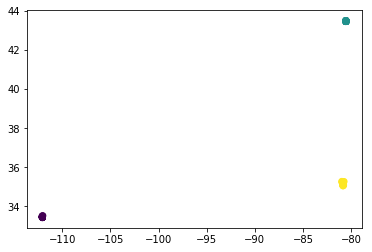

In [75]:
plt.scatter(x = 'longitude', y = 'latitude', c = 'cluster_labels', data = df)
plt.show()

In [77]:
df_grouped = df.groupby('cluster_labels').count()
df_grouped

,longitude,latitude
cluster_labels,,
0,100,100
1,100,100
2,100,100
